### I made this exercise thanks to [Car Prediction Dataset](https://www.kaggle.com/datasets/zafarali27/car-price-prediction/data). I'm going to analyze and create models to predict car prices.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# First we create the dataframe and see what's inside
df= pd.read_csv('data/car_price_prediction_.csv')
df.head()

Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [4]:
df.Price.mean

<bound method Series.mean of 0       26613.92
1       14679.61
2       44402.61
3       86374.33
4       73577.10
          ...   
2495    61384.10
2496    24710.35
2497    29902.45
2498    46085.67
2499    16594.14
Name: Price, Length: 2500, dtype: float64>

In [5]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum()
missing_values


Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

### There's none, which is a good sign

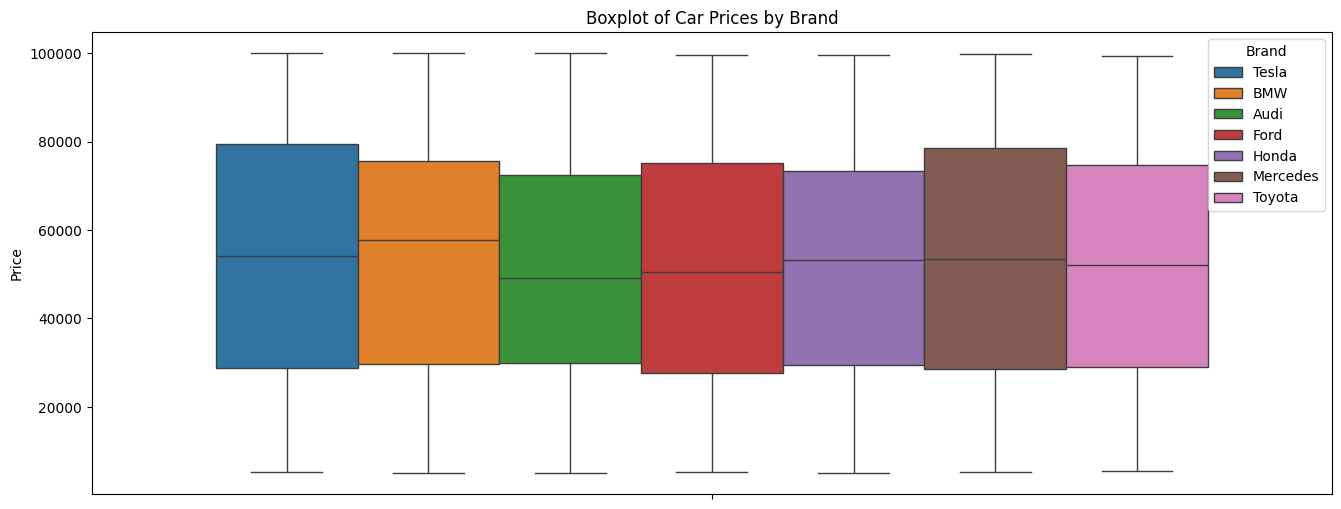

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
sns.boxplot(df, y='Price', hue='Brand')
plt.title('Boxplot of Car Prices by Brand')
plt. savefig("results/BrandComparison.png")


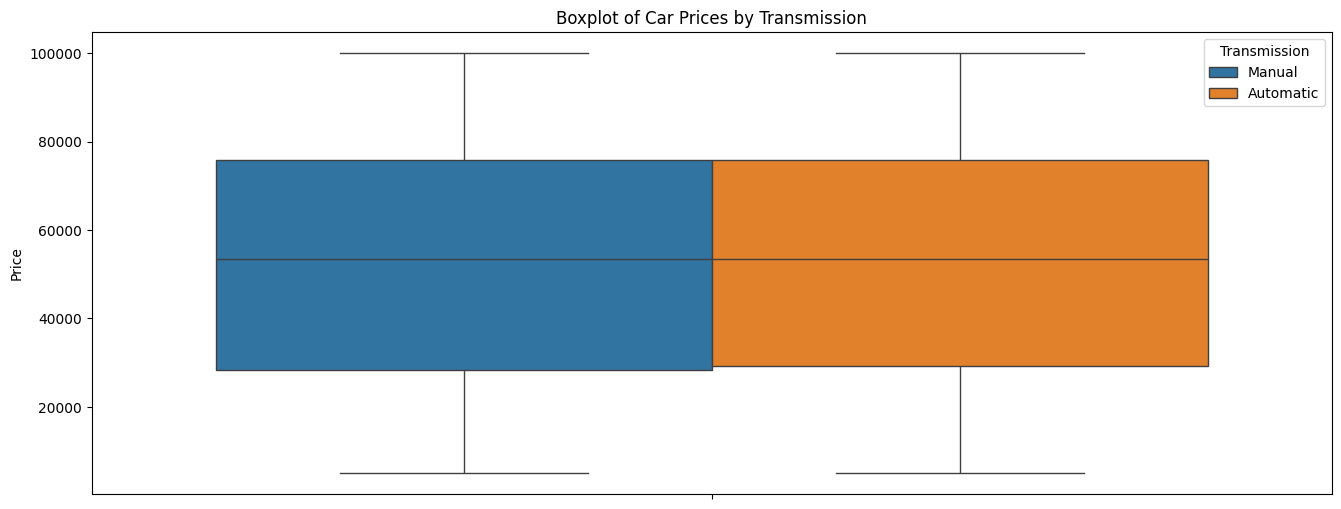

In [20]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
sns.boxplot(df, y='Price', hue='Transmission')
plt.title('Boxplot of Car Prices by Transmission')
plt. savefig("results/TransmissionComparison.png")

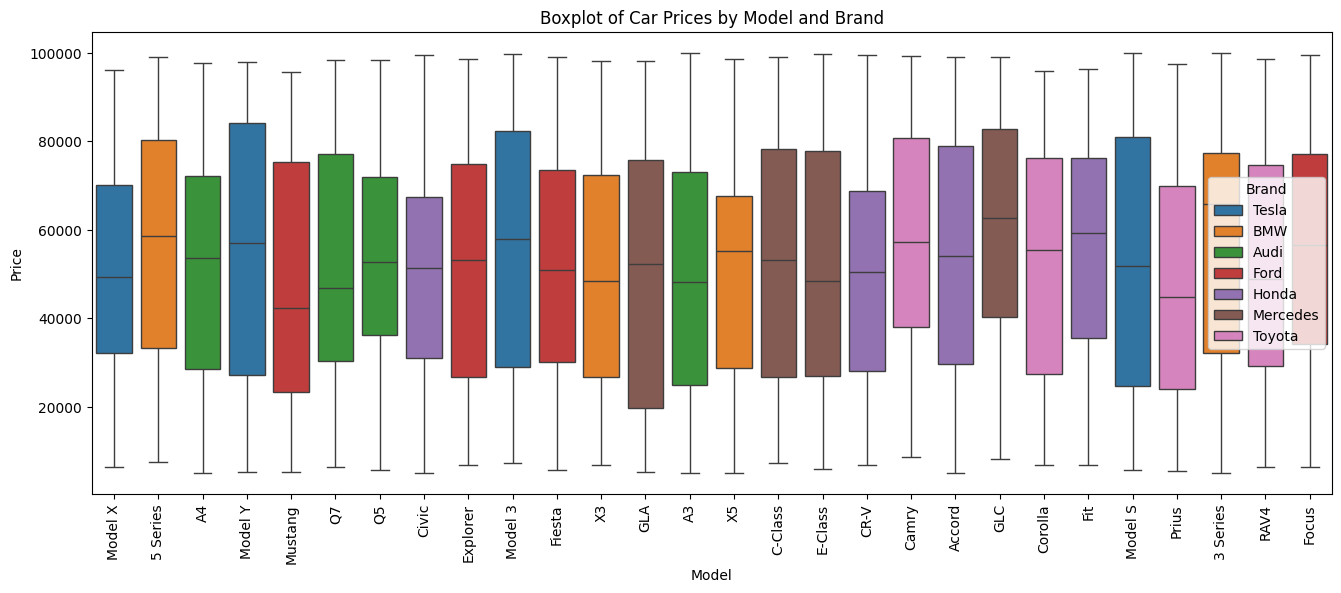

In [10]:
# Set the width and height of the figure
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Model', y='Price', hue='Brand')
plt.title('Boxplot of Car Prices by Model and Brand')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many models
plt.savefig("results/ModelPriceComparison.png")


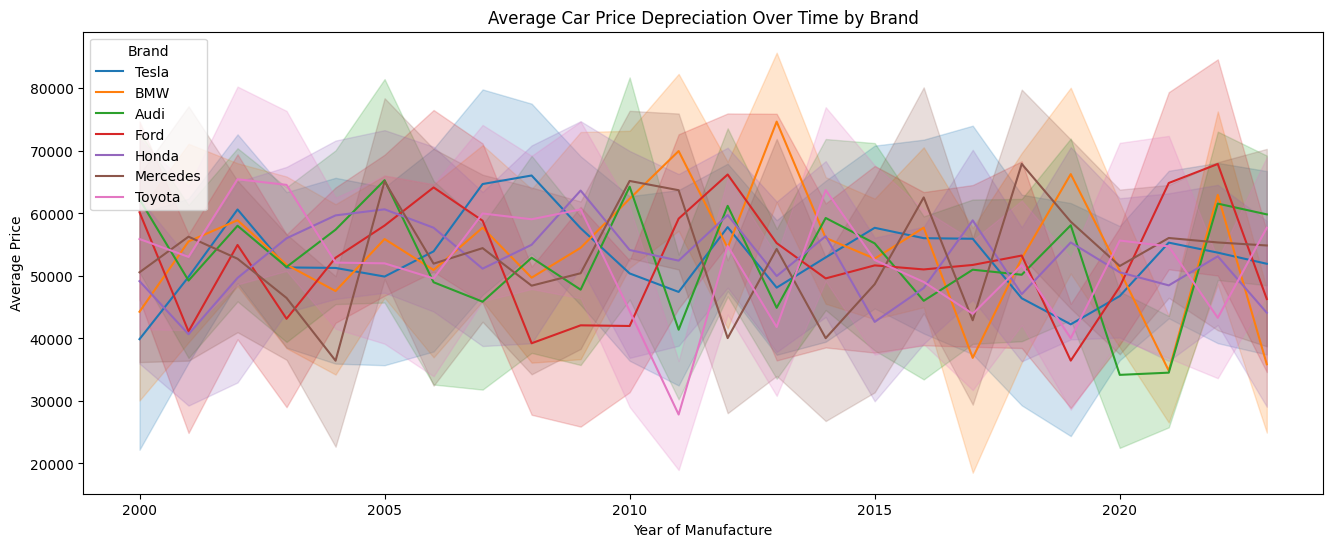

In [12]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='Year', y='Price', hue='Brand', estimator='mean')
plt.title('Average Car Price Depreciation Over Time by Brand')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Price')
plt.savefig("results/AvgDepreciationByYear.png")


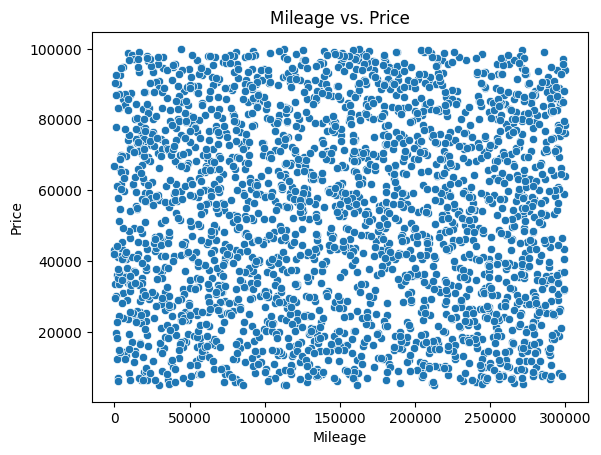

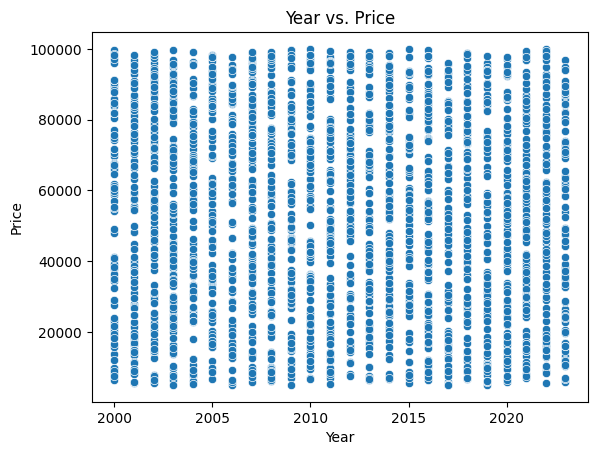

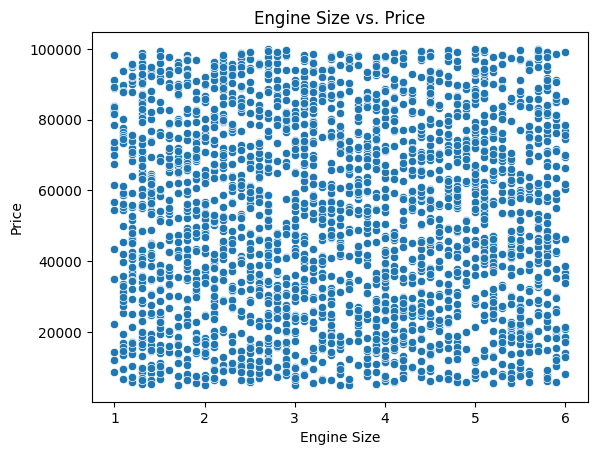

In [8]:
# Scatter plot for Mileage vs. Price
sns.scatterplot(x=df['Mileage'], y=df['Price'])
plt.title('Mileage vs. Price')
plt.show()

# Scatter plot for Year vs. Price
sns.scatterplot(x=df['Year'], y=df['Price'])
plt.title('Year vs. Price')
plt.show()

# Scatter plot for Engine Size vs. Price
sns.scatterplot(x=df['Engine Size'], y=df['Price'])
plt.title('Engine Size vs. Price')
plt.show()

Text(0.5, 1.0, 'Boxplot of Car Prices by Fuel Type')

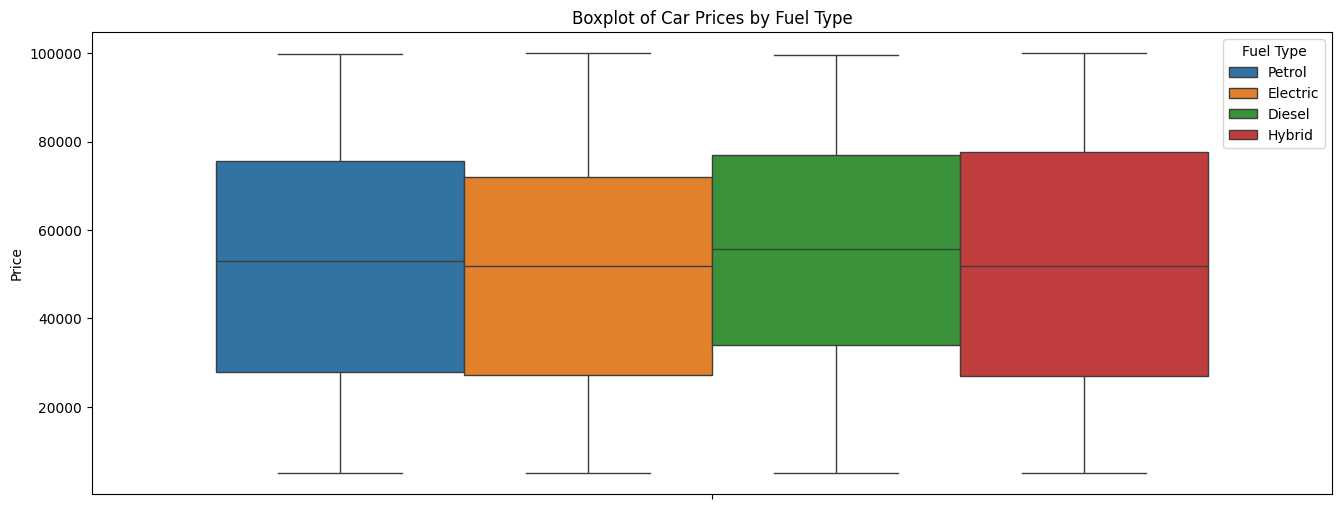

In [26]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
sns.boxplot(df, y='Price', hue='Fuel Type')
plt.title('Boxplot of Car Prices by Fuel Type')

<Figure size 1600x600 with 0 Axes>

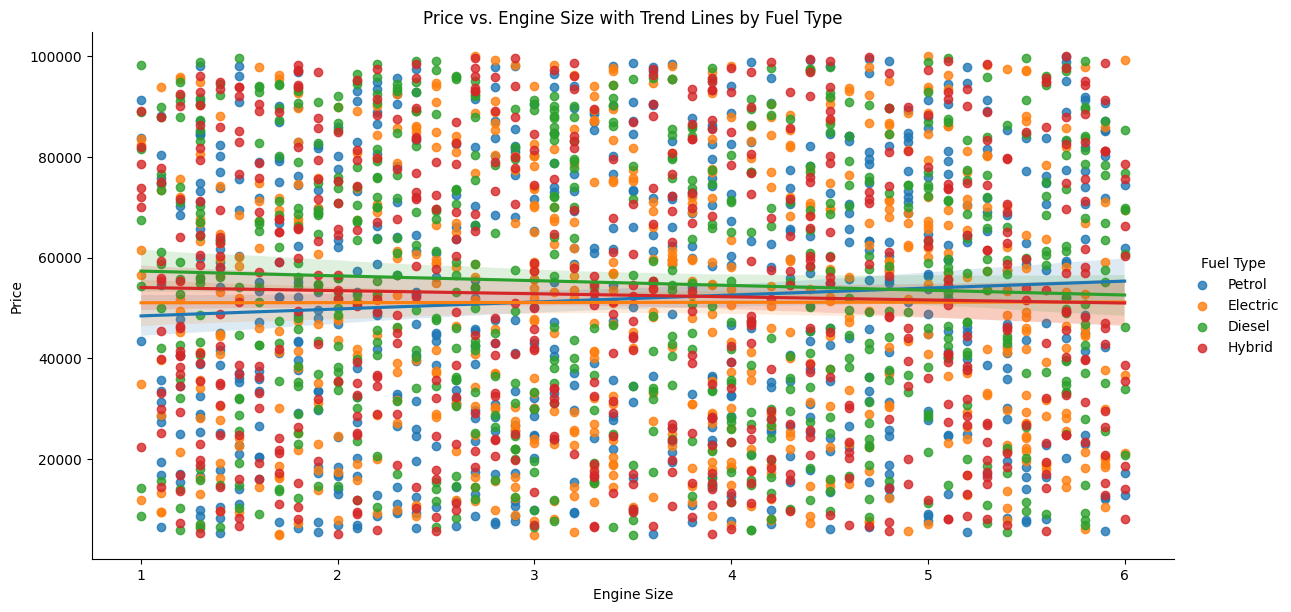

In [16]:
plt.figure(figsize=(16, 6))
sns.lmplot(data=df, x='Engine Size', y='Price', hue='Fuel Type', aspect=2, height=6)
plt.title('Price vs. Engine Size with Trend Lines by Fuel Type')
plt.savefig("results/EngineSizePriceTrendByFuelType.png")


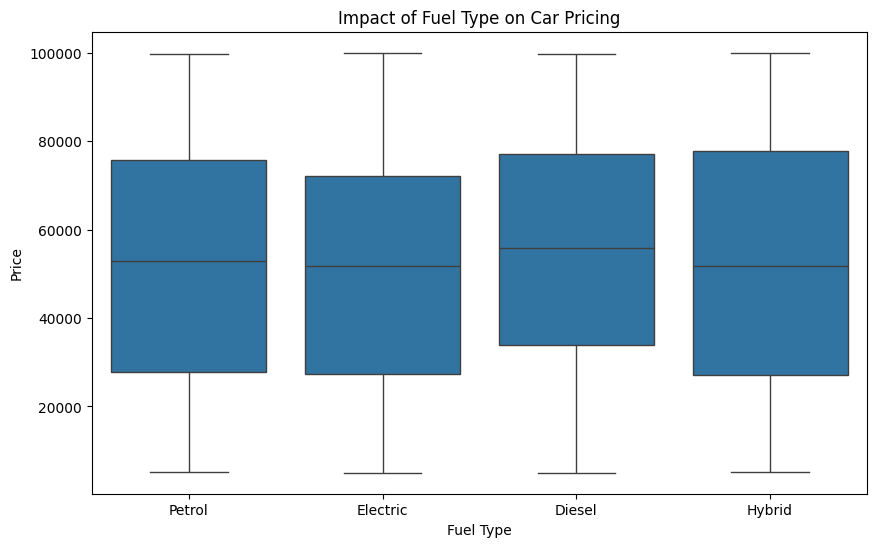

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fuel Type', y='Price')
plt.title('Impact of Fuel Type on Car Pricing')
plt.savefig("results/PriceByFuelType.png")


Text(0.5, 1.0, 'Boxplot of Car Prices by Condition')

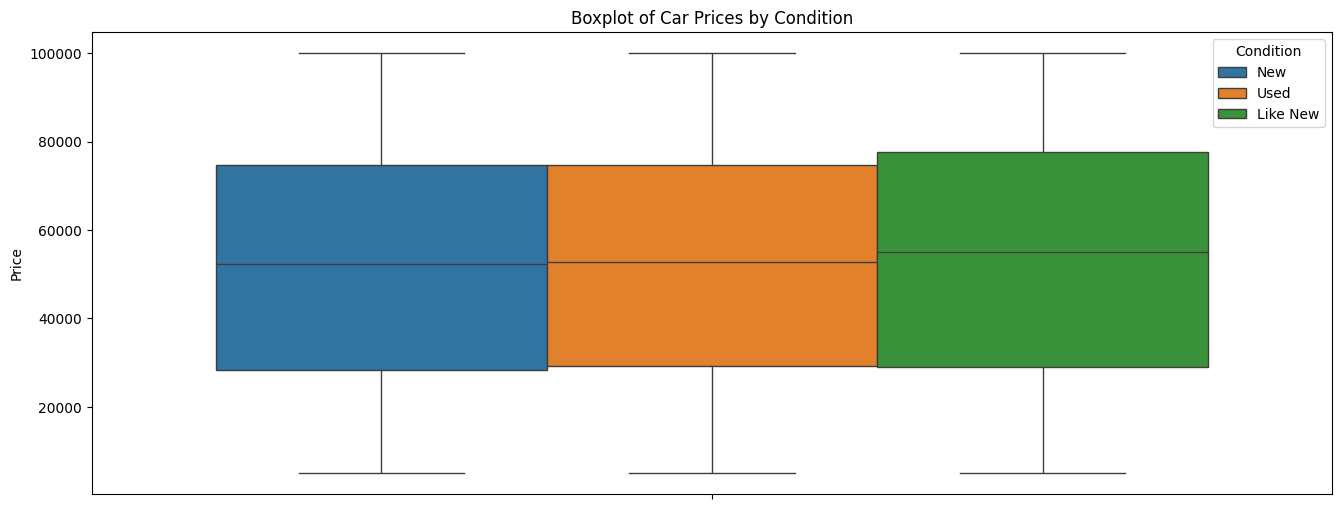

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
sns.boxplot(df, y='Price', hue='Condition')
plt.title('Boxplot of Car Prices by Condition')

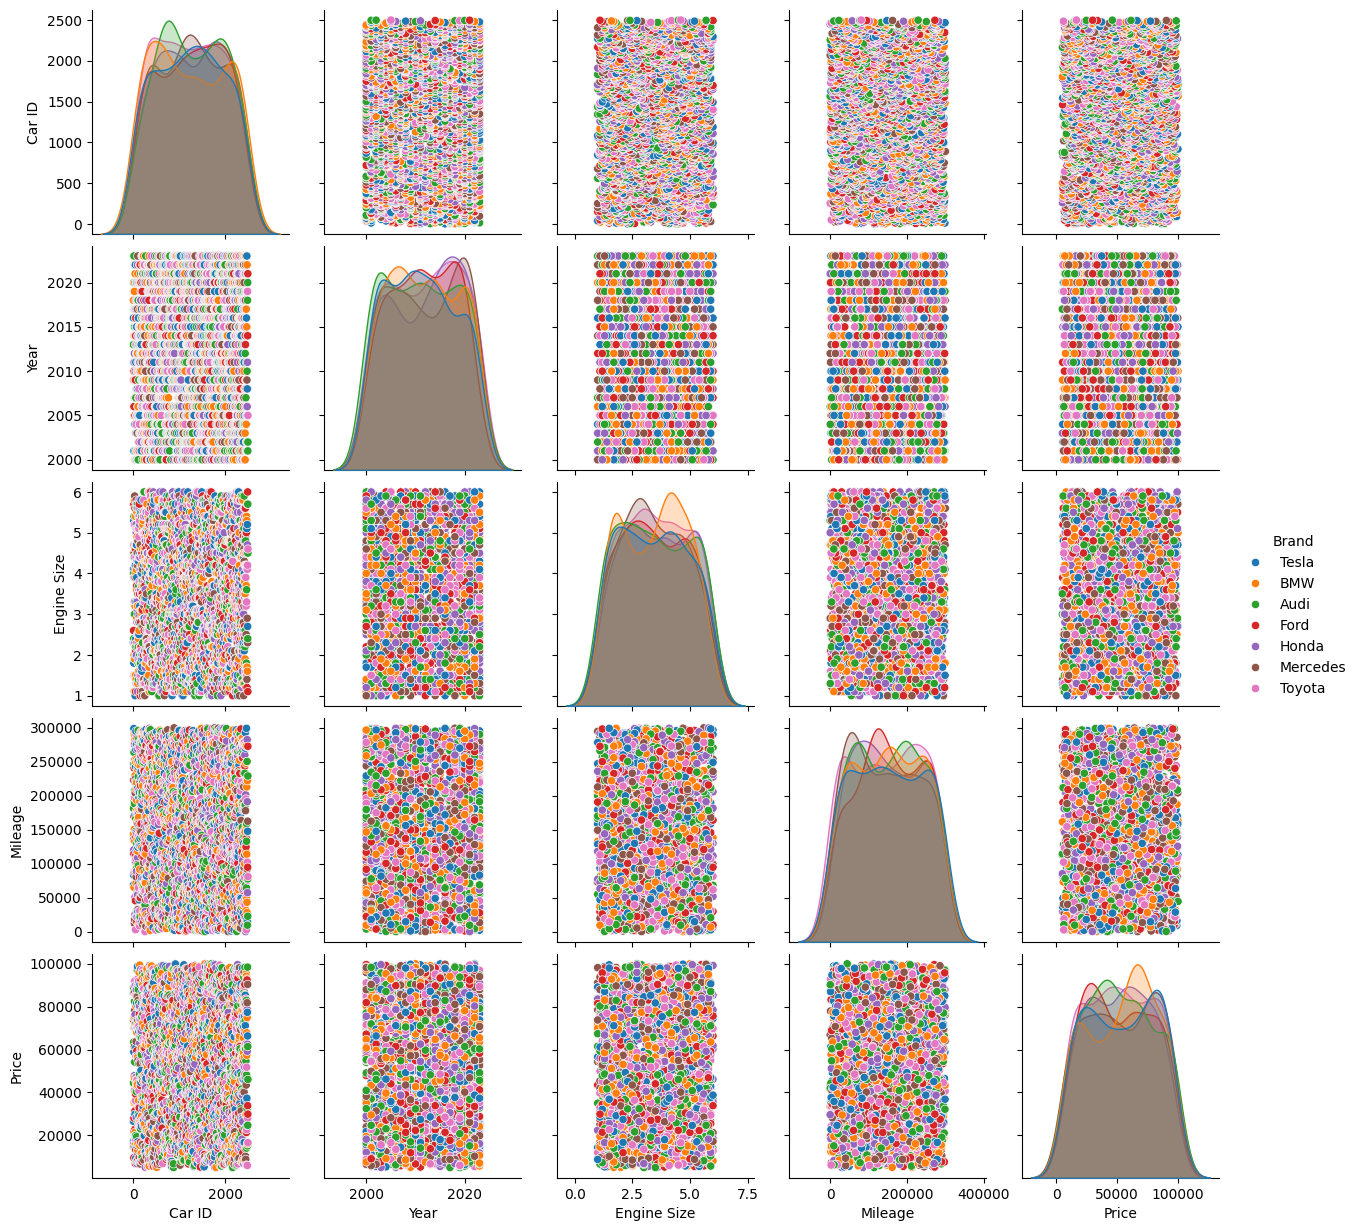

In [3]:
sns.pairplot(df, hue='Brand')

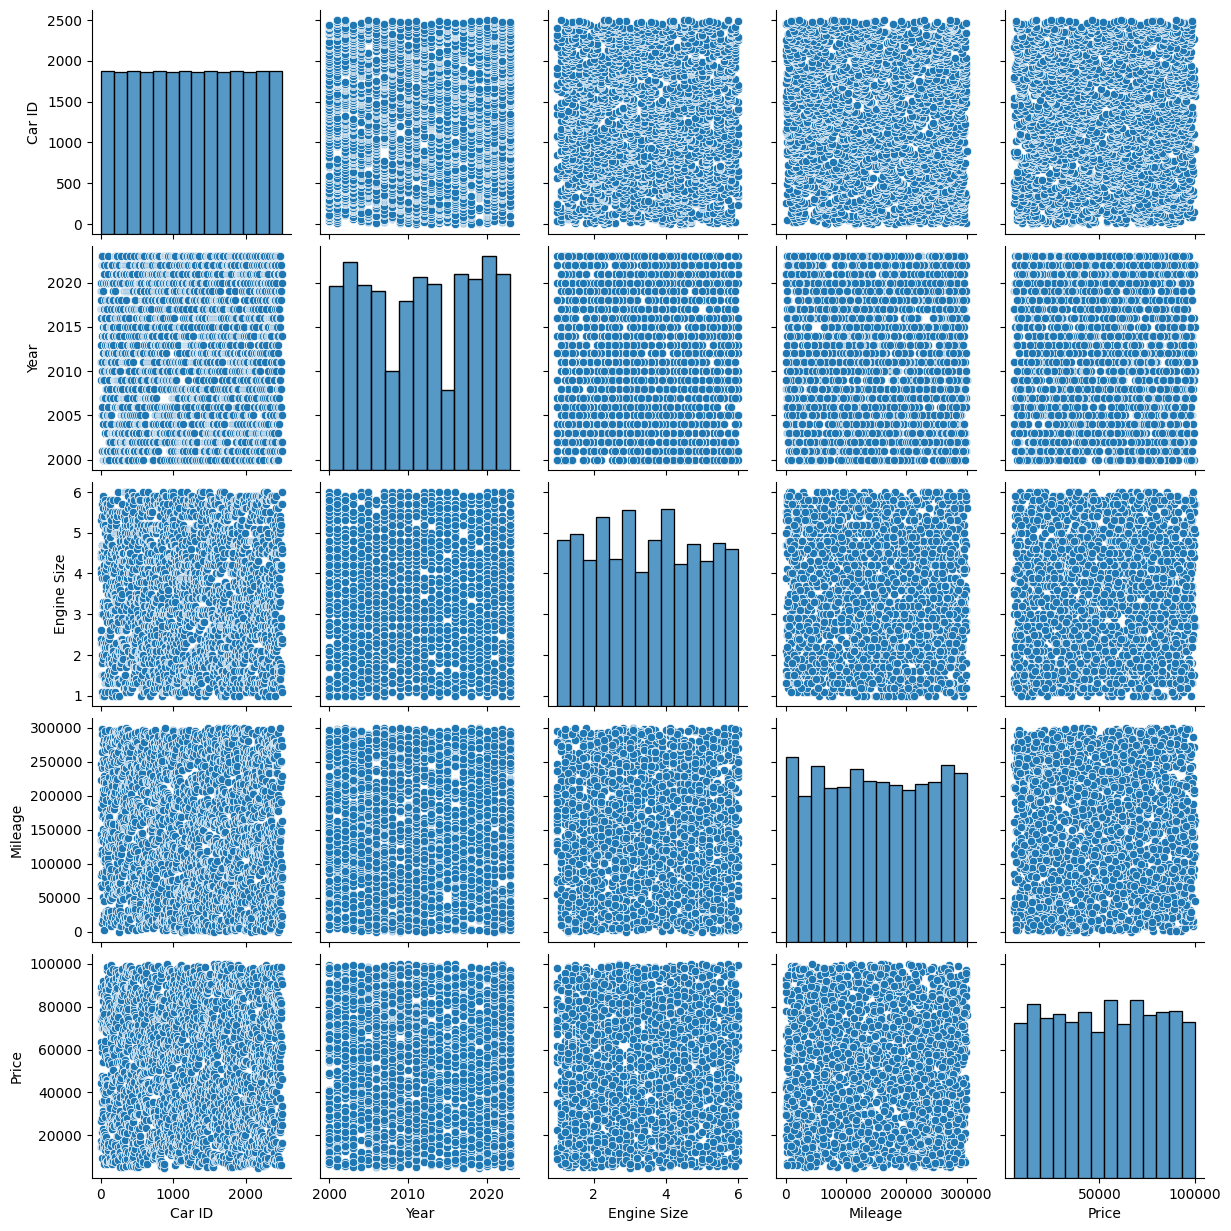

In [14]:
sns.pairplot(df)

### The correlation appears low, which is a poor indicator for Linear Regression but good for Decision Trees, Random Forests, and Neural Networks. Additionally, the histograms do not appear normal, which is also a drawback for Linear Regression.

In [22]:
numerical_values = df.select_dtypes(exclude=['object'])
numerical_values

# I separate every numerical value to get to work 
# on the heatmap and confirm if the correlation is indeed low

Car ID  Year  Engine Size  Mileage     Price
0          1  2016          2.3   114832  26613.92
1          2  2018          4.4   143190  14679.61
2          3  2013          4.5   181601  44402.61
3          4  2011          4.1    68682  86374.33
4          5  2009          2.6   223009  73577.10
...      ...   ...          ...      ...       ...
2495    2496  2020          2.4    22650  61384.10
2496    2497  2001          5.7    77701  24710.35
2497    2498  2021          1.1   272827  29902.45
2498    2499  2002          4.5   229164  46085.67
2499    2500  2005          4.6    80978  16594.14

[2500 rows x 5 columns]

<Axes: >

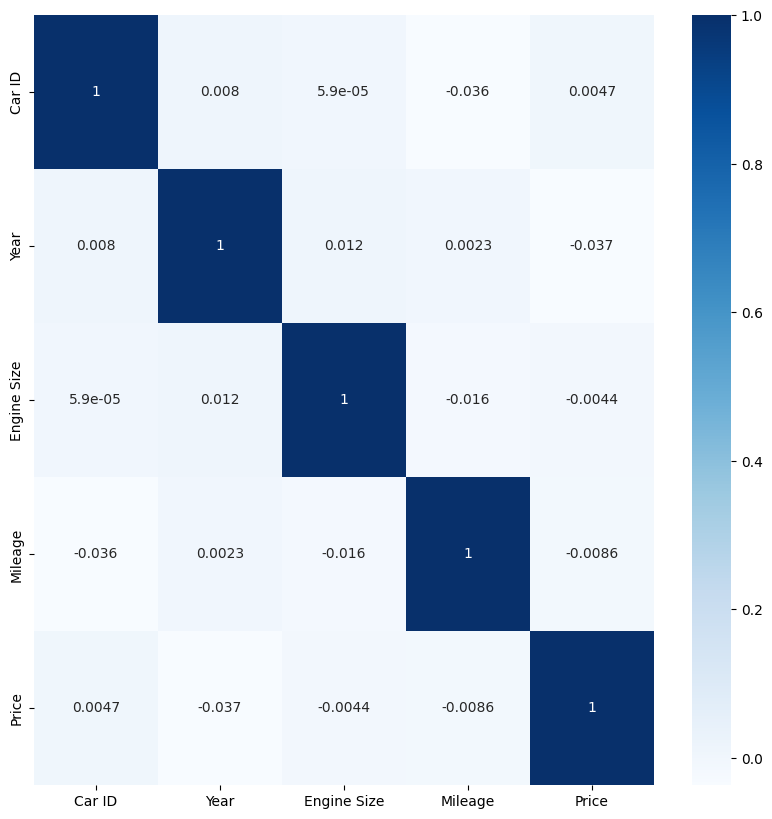

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical_values.corr(), annot=True, cmap='Blues')


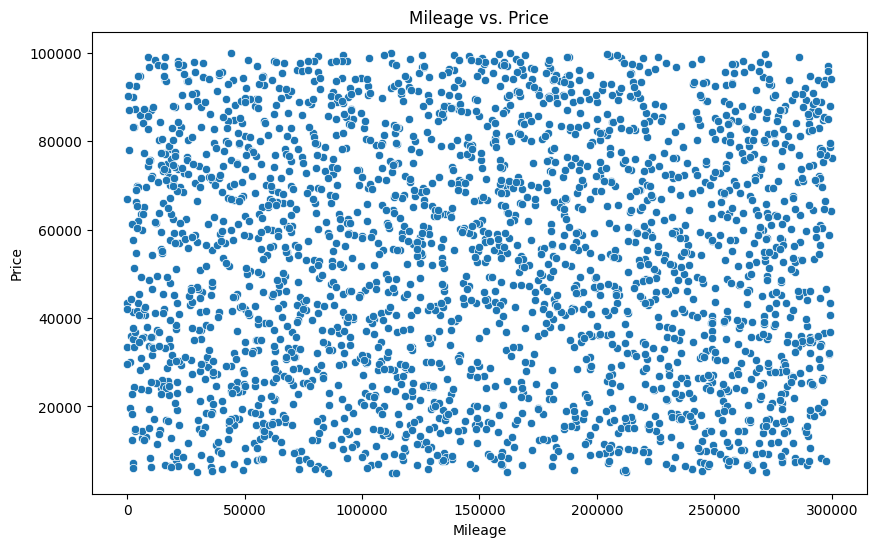

In [5]:
# Scatter plot for Mileage vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage', y='Price')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

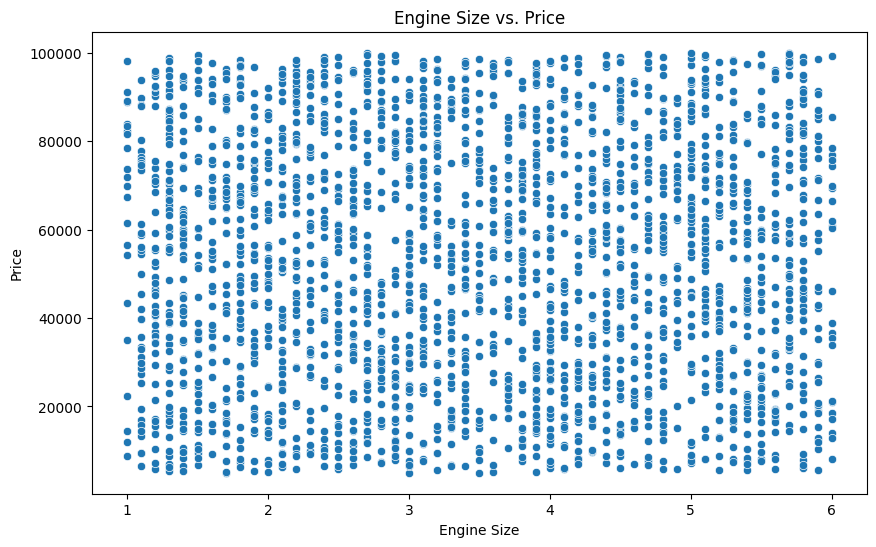

In [6]:
# Scatter plot for Engine Size vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine Size', y='Price')
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


### This confirms our Linear Regression is gonna perform poorly, but let's see how poorly
Linear Regression assumes a linear relationship between the independent variables and the target variable, and it is sensitive to non-linearity, multicollinearity, and outliers. Given the characteristics of our dataset, we anticipate that the performance of the Linear Regression model may not meet expectations.

However, this exercise is valuable for understanding the limitations of Linear Regression in this context and for establishing a benchmark against which we can compare more complex models. We will evaluate the model's performance using appropriate metrics and discuss its implications.

Price Distribution: Analyze the distribution of car prices. Are there a lot of high-priced luxury cars, or is the dataset skewed towards more affordable options?

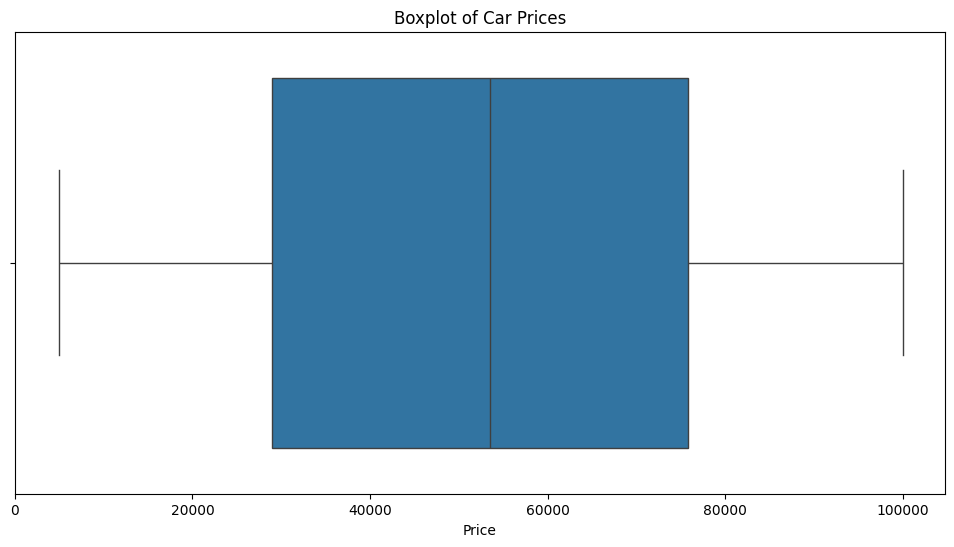

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.xlim(left=0)  # Adjust as needed
plt.show()


In [24]:
# Get unique models
unique_models = df['Model'].unique()

# Print each model
for model in unique_models:
    print(model)


Model X
5 Series
A4
Model Y
Mustang
Q7
Q5
Civic
Explorer
Model 3
Fiesta
X3
GLA
A3
X5
C-Class
E-Class
CR-V
Camry
Accord
GLC
Corolla
Fit
Model S
Prius
3 Series
RAV4
Focus


In [25]:
# List of luxury models
luxury_models = ['Model X', 'Model S', '5 Series', 'A4', 'Q7', 'Q5', 
                 'C-Class', 'E-Class', 'X3', 'GLA', 'X5', 'Q8', 
                 'A8', 'Porsche 911', 'Lexus ES', 'Tesla Model 3', 
                 'Civic Type R', 'Accord Sport', 'Mustang GT']  # Add more as needed

# Create a new column 'Luxury' based on the model
df['Luxury'] = df['Model'].apply(lambda x: 'Yes' if x in luxury_models else 'No')


C:\Users\warne\AppData\Local\Temp\ipykernel_32628\3540824795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Luxury', y='Price', palette={'Yes': 'gold', 'No': 'lightblue'})


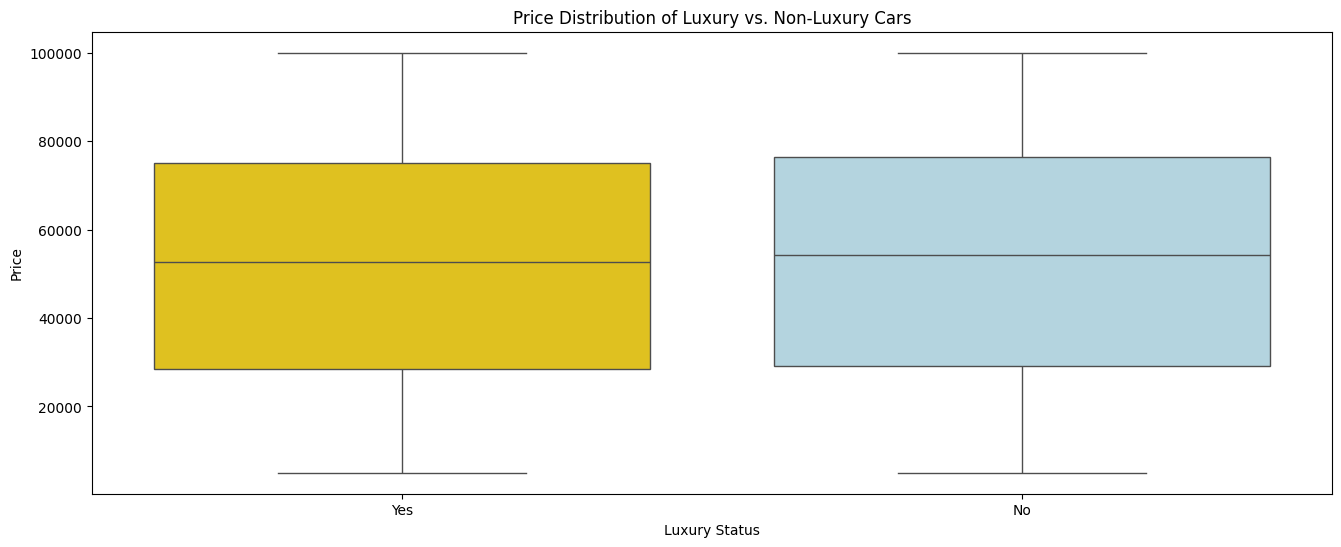

In [29]:
# Set the figure size
plt.figure(figsize=(16, 6))

# Create a boxplot to compare price distributions
sns.boxplot(data=df, x='Luxury', y='Price', palette={'Yes': 'gold', 'No': 'lightblue'})
plt.title('Price Distribution of Luxury vs. Non-Luxury Cars')
plt.xlabel('Luxury Status')
plt.ylabel('Price')
plt.savefig("results/LuxuryComparison.png")

# Show the plot
plt.show()
